In [1]:
# Import libraries
import pandas as pd
import seaborn as ns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# importing dataset
dataset=pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

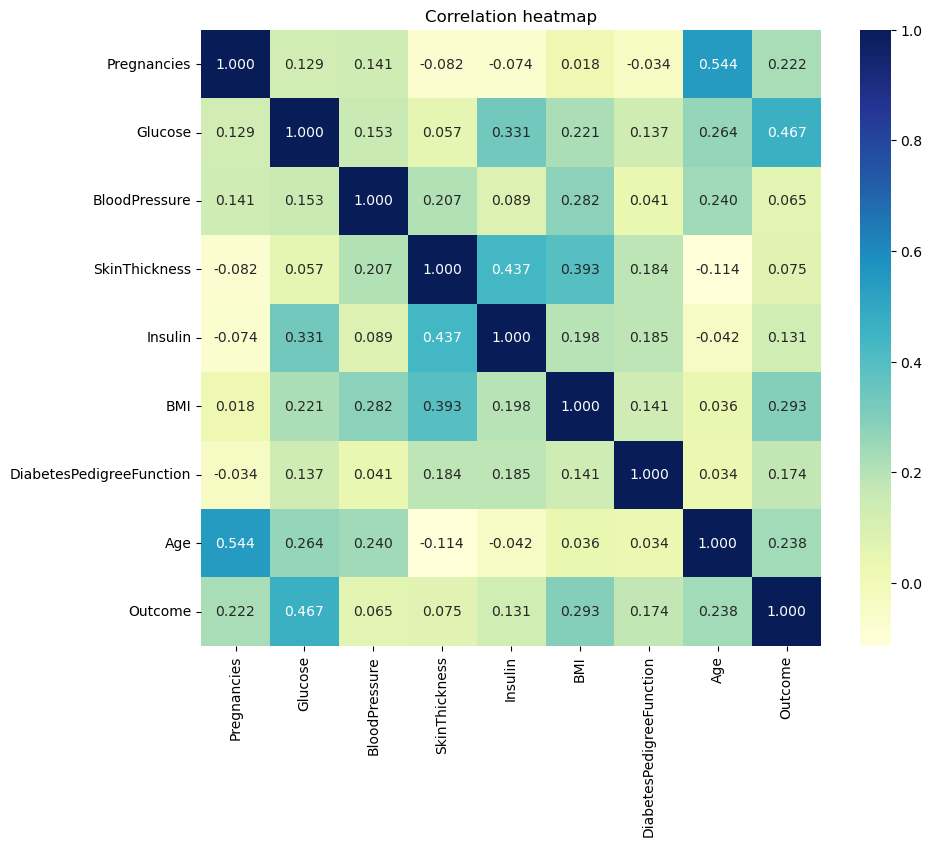

In [15]:
# Correlation of independent variables
plt.figure(figsize=(10,8))
ns.heatmap(dataset.corr() , annot= True ,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation heatmap")

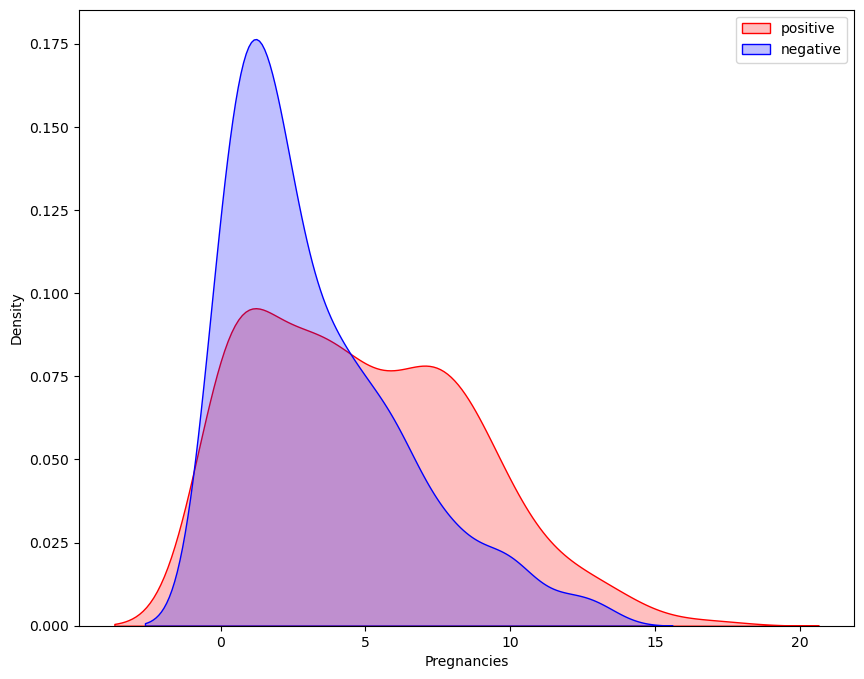

In [18]:
# Exploring pregnancies and target variables
plt.figure(figsize=(10,8))
# Plotting density function grap of the pregnancies and target variables
kde= ns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="red",shade=True)
kde= ns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="blue",shade=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["positive","negative"])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

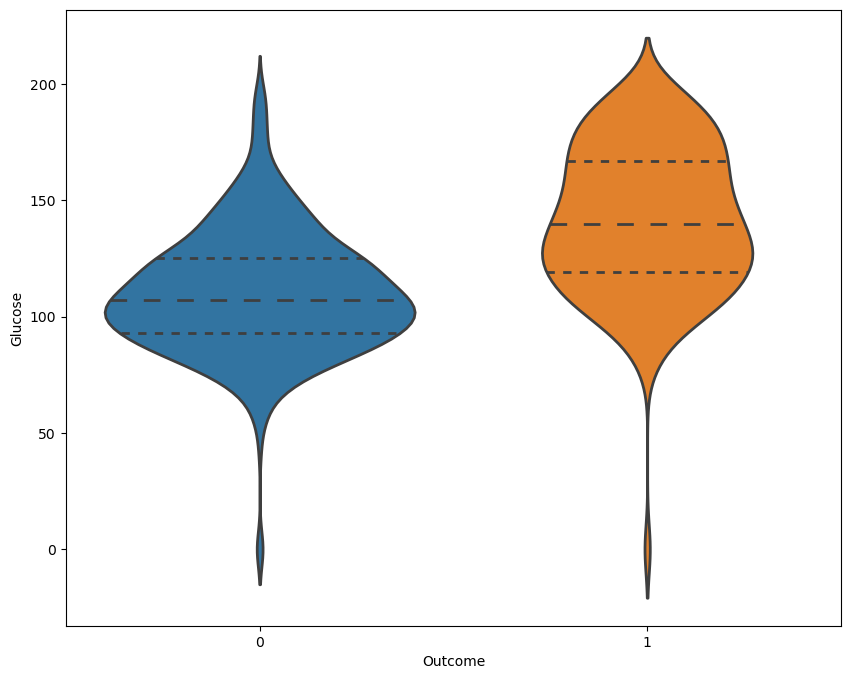

In [21]:
# Exploring Glucose and target varibles
plt.figure(figsize=(10,8))
ns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,linewidth=2,inner="quart")

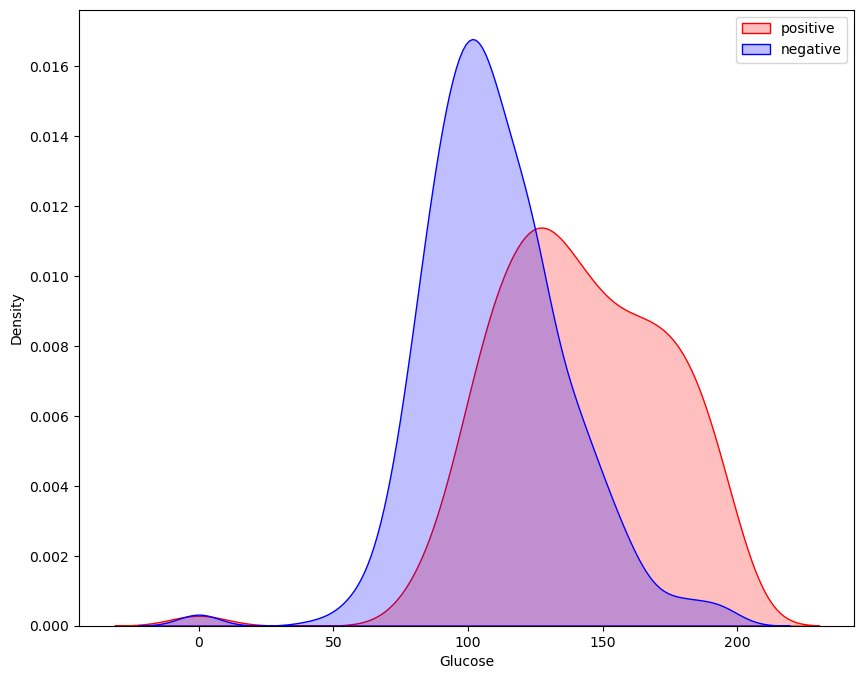

In [22]:
# Exploring Glucose and target variables
plt.figure(figsize=(10,8))
# Plotting density function grap of the Glucose and target variables
kde= ns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1],color="red",shade=True)
kde= ns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0],color="blue",shade=True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["positive","negative"])

In [24]:
# Replace a values with the mean/median of the respective feature
#Glucose
dataset["Glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].median())
#BloodPressure
dataset["BloodPressure"]=dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
#BMI
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].median())
#Insulin
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].median())


In [25]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,30.5,30.1,0.349,47,1


In [29]:
#Spliting the dependent and independent varible
x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]

In [30]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,0,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,0,30.5,30.1,0.349,47


In [31]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [32]:
#spliting the datset into testing and training dataset
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [34]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,30.5,24.0,1.022,34
223,7,142,60,33,190.0,28.8,0.687,61
393,4,116,72,12,87.0,22.1,0.463,37
766,1,126,60,0,30.5,30.1,0.349,47
570,3,78,70,0,30.5,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,0,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,0,30.5,42.4,0.205,29


In [35]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190.0,34.0,0.430,43
324,2,112,75,32,30.5,35.7,0.148,21
624,2,108,64,0,30.5,30.8,0.158,21
690,8,107,80,0,30.5,24.6,0.856,34
473,7,136,90,0,30.5,29.9,0.210,50
...,...,...,...,...,...,...,...,...
311,0,106,70,37,148.0,39.4,0.605,22
429,1,95,82,25,180.0,35.0,0.233,43
182,1,117,74,20,23.0,27.7,0.299,21
586,8,143,66,0,30.5,34.9,0.129,41


In [36]:
y_train

464    0
223    0
393    0
766    1
570    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 514, dtype: int64

In [37]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
311    0
429    1
182    0
586    1
679    0
Name: Outcome, Length: 254, dtype: int64

In [42]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [47]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    
    #checking accuracy score
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

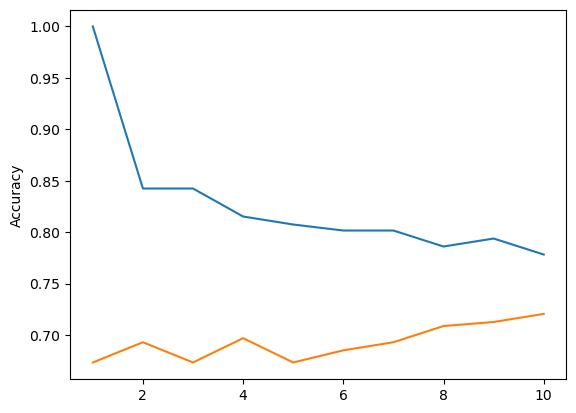

In [46]:
plt.plot(range(1,11),training_accuracy,label="training_accuracy")
plt.plot(range(1,11),test_accuracy,label="test_accuracy")
plt.ylabel("Accuracy")
plt.Xlabel("n_neighbors")
plt.legend()

In [50]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),": Training_accuracy")
print(knn.score(x_test,y_test),": Test_accuracy")

0.7937743190661478 : Training_accuracy
0.7125984251968503 : Test_accuracy


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": Training_accuracy")
print(dt.score(x_test,y_test),": Test_accuracy")


1.0 : Training_accuracy
0.6850393700787402 : Test_accuracy


In [52]:
dt= DecisionTreeClassifier(random_state=0,max_depth=1)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": Training_accuracy")
print(dt.score(x_test,y_test),": Test_accuracy")

0.7626459143968871 : Training_accuracy
0.7165354330708661 : Test_accuracy


In [54]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": Training_accuracy")
print(mlp.score(x_test,y_test),": Test_accuracy")

0.7684824902723736 : Training_accuracy
0.6889763779527559 : Test_accuracy


In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [60]:
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train_scaled,y_train),": Training_accuracy")
print(mlp.score(x_test_scaled,y_test),": Test_accuracy")

0.6459143968871596 : Training_accuracy
0.6614173228346457 : Test_accuracy


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
